In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('dataset_assignment.csv')
df.head()

,Identifier,sex,age,income,purchase
0,15624510,Male,19.0,19000.0,0.0
1,15810944,Male,35.0,20000.0,0.0
2,15668575,Female,26.0,43000.0,0.0
3,15603246,Female,27.0,57000.0,0.0
4,15804002,Male,19.0,76000.0,0.0


In [3]:
df=df.dropna()
df.isnull().sum()

Identifier    0
sex           0
age           0
income        0
purchase      0
dtype: int64

In [4]:
df['sex']=df['sex'].astype('category')
df['age']=df['age'].astype('int')
df['purchase']=df['purchase'].astype('int')
df=pd.get_dummies(df,columns=['sex'],drop_first=True)
df.head()

,Identifier,age,income,purchase,sex_Male
0,15624510,19,19000.0,0,1
1,15810944,35,20000.0,0,1
2,15668575,26,43000.0,0,0
3,15603246,27,57000.0,0,0
4,15804002,19,76000.0,0,1


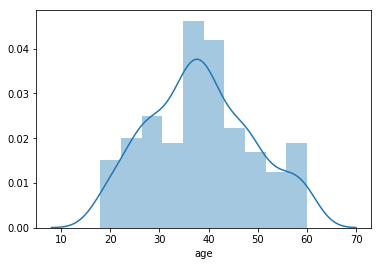

In [5]:
sns.distplot(df['age'])

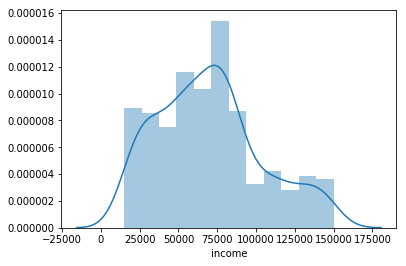

In [6]:
sns.distplot(df['income'])

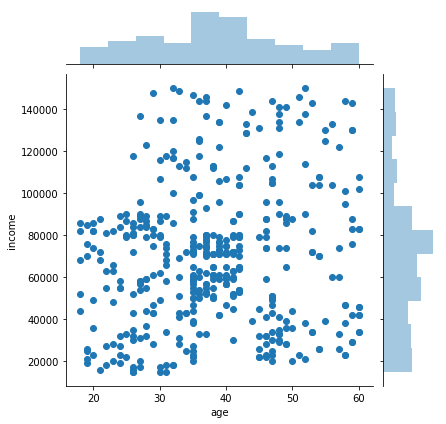

In [7]:
sns.jointplot(x='age',y='income',data=df)

sns.jointplot(x='age',y='income',data=df,color='red',kind='kde');

In [8]:
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [9]:
df[['age', 'income']] = StandardScaler().fit_transform(df[['age', 'income']])

In [10]:
## Used a different number for random state to differentiate with other groups
train, test = train_test_split(df, test_size=0.3, random_state=1105)

## FULL MODEL

In [11]:
modelfull = smf.logit(formula="purchase ~ age + income + sex_Male", data=train).fit()
print(modelfull.summary())

Optimization terminated successfully.
         Current function value: 0.347925
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               purchase   No. Observations:                  306
Model:                          Logit   Df Residuals:                      302
Method:                           MLE   Df Model:                            3
Date:                Mon, 19 Jul 2021   Pseudo R-squ.:                  0.4641
Time:                        19:00:02   Log-Likelihood:                -106.47
converged:                       True   LL-Null:                       -198.67
                                        LLR p-value:                 9.843e-40
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3310      0.267     -4.982      0.000      -1.855      -0.807
age            2.6866      0.

In [12]:
## Training set predictions
trainpred_prob=modelfull.predict(train)
train_prediction = list(map(round, trainpred_prob))

In [13]:
print(classification_report(train['purchase'],train_prediction))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       198
           1       0.87      0.71      0.78       108

    accuracy                           0.86       306
   macro avg       0.86      0.83      0.84       306
weighted avg       0.86      0.86      0.86       306



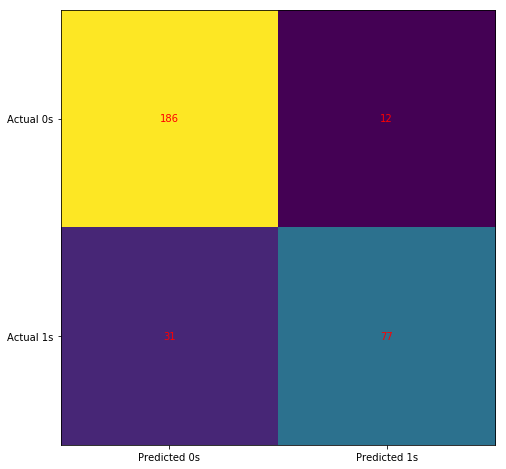

In [14]:
cm = confusion_matrix(train['purchase'],train_prediction)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [15]:
## Test set predictions
pred_prob=modelfull.predict(test)
prediction = list(map(round, pred_prob))

In [16]:
print(classification_report(test['purchase'],prediction))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87        73
           1       0.87      0.80      0.83        59

    accuracy                           0.86       132
   macro avg       0.86      0.85      0.85       132
weighted avg       0.86      0.86      0.86       132



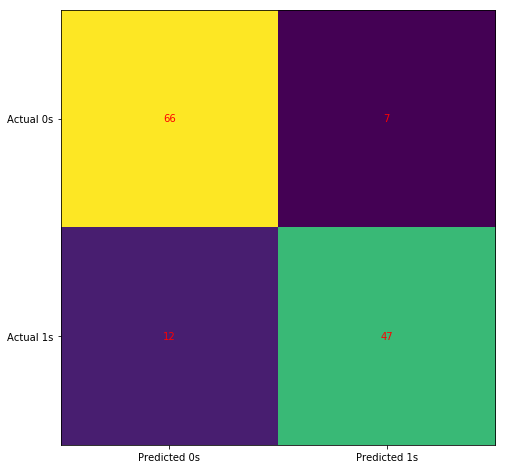

In [17]:
cm = confusion_matrix(test['purchase'],prediction)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## Model with no age predictor

In [18]:
modelnoage = smf.logit(formula="purchase ~ income + sex_Male", data=train).fit()
print(modelnoage.summary())

Optimization terminated successfully.
         Current function value: 0.595348
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               purchase   No. Observations:                  306
Model:                          Logit   Df Residuals:                      303
Method:                           MLE   Df Model:                            2
Date:                Mon, 19 Jul 2021   Pseudo R-squ.:                 0.08302
Time:                        19:00:02   Log-Likelihood:                -182.18
converged:                       True   LL-Null:                       -198.67
                                        LLR p-value:                 6.870e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6570      0.178     -3.682      0.000      -1.007      -0.307
income         0.7728      0.

In [19]:
## Train set predictions
trainpred_prob=modelnoage.predict(train)
train_prediction = list(map(round, trainpred_prob))

In [20]:
print(classification_report(train['purchase'],train_prediction))

              precision    recall  f1-score   support

           0       0.74      0.97      0.84       198
           1       0.89      0.38      0.53       108

    accuracy                           0.76       306
   macro avg       0.82      0.68      0.69       306
weighted avg       0.79      0.76      0.73       306



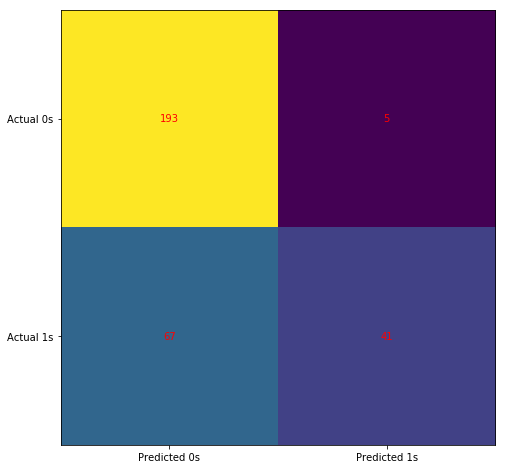

In [21]:
cm = confusion_matrix(train['purchase'],train_prediction)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [22]:
## Test set predictions
pred_prob=modelnoage.predict(test)
prediction = list(map(round, pred_prob))

In [23]:
print(classification_report(test['purchase'],prediction))

              precision    recall  f1-score   support

           0       0.71      0.92      0.80        73
           1       0.84      0.53      0.65        59

    accuracy                           0.74       132
   macro avg       0.77      0.72      0.72       132
weighted avg       0.76      0.74      0.73       132



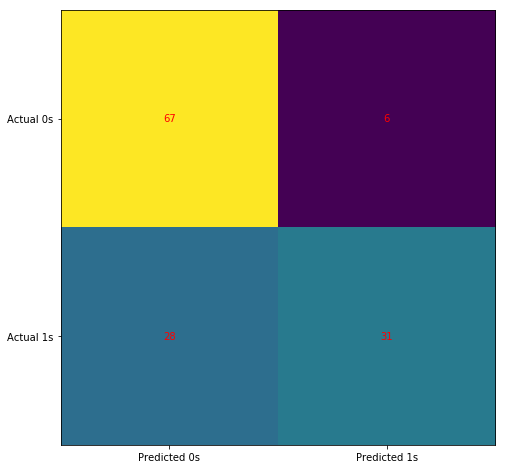

In [24]:
cm = confusion_matrix(test['purchase'],prediction)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## Model with no income predictor

In [25]:
modelnoinc = smf.logit(formula="purchase ~ age + sex_Male", data=train).fit()
print(modelnoinc.summary())

Optimization terminated successfully.
         Current function value: 0.418672
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               purchase   No. Observations:                  306
Model:                          Logit   Df Residuals:                      303
Method:                           MLE   Df Model:                            2
Date:                Mon, 19 Jul 2021   Pseudo R-squ.:                  0.3551
Time:                        19:00:02   Log-Likelihood:                -128.11
converged:                       True   LL-Null:                       -198.67
                                        LLR p-value:                 2.279e-31
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0954      0.236     -4.642      0.000      -1.558      -0.633
age            2.1038      0.

In [26]:
## Train set predictions
trainpred_prob=modelnoinc.predict(train)
train_prediction = list(map(round, trainpred_prob))

In [27]:
print(classification_report(train['purchase'],train_prediction))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       198
           1       0.86      0.69      0.76       108

    accuracy                           0.85       306
   macro avg       0.85      0.81      0.83       306
weighted avg       0.85      0.85      0.85       306



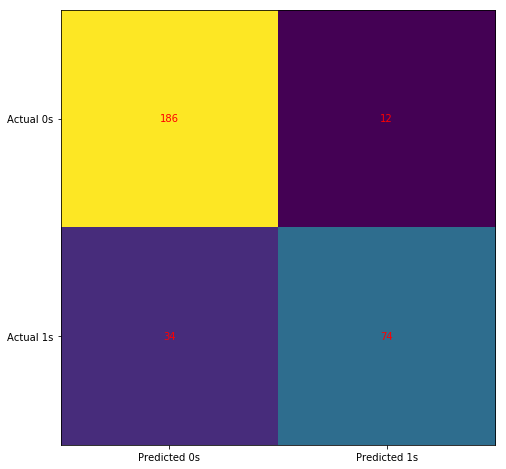

In [28]:
cm = confusion_matrix(train['purchase'],train_prediction)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [29]:
## Test set predictions
pred_prob=modelnoinc.predict(test)
prediction = list(map(round, pred_prob))

In [30]:
print(classification_report(test['purchase'],prediction))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        73
           1       0.87      0.68      0.76        59

    accuracy                           0.81       132
   macro avg       0.82      0.80      0.80       132
weighted avg       0.82      0.81      0.81       132



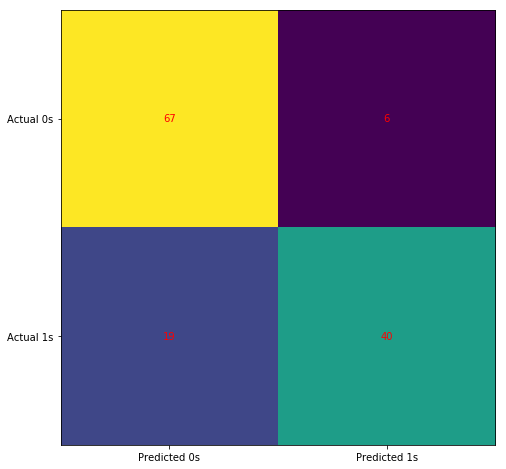

In [31]:
cm = confusion_matrix(test['purchase'],prediction)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## Model with no sex_Male predictor

In [32]:
modelnogen = smf.logit(formula="purchase ~ age + income", data=train).fit()
print(modelnogen.summary())

Optimization terminated successfully.
         Current function value: 0.351607
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               purchase   No. Observations:                  306
Model:                          Logit   Df Residuals:                      303
Method:                           MLE   Df Model:                            2
Date:                Mon, 19 Jul 2021   Pseudo R-squ.:                  0.4584
Time:                        19:00:03   Log-Likelihood:                -107.59
converged:                       True   LL-Null:                       -198.67
                                        LLR p-value:                 2.788e-40
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0604      0.186     -5.690      0.000      -1.426      -0.695
age            2.6185      0.

In [33]:
## Train set predictions
trainpred_prob=modelnogen.predict(train)
train_prediction = list(map(round, trainpred_prob))

In [34]:
print(classification_report(train['purchase'],train_prediction))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       198
           1       0.83      0.69      0.75       108

    accuracy                           0.84       306
   macro avg       0.84      0.80      0.82       306
weighted avg       0.84      0.84      0.84       306



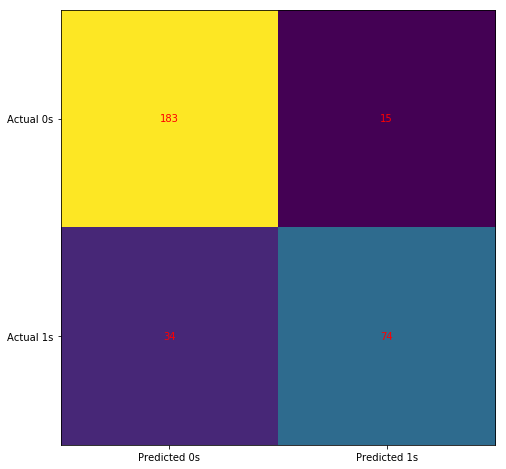

In [35]:
cm = confusion_matrix(train['purchase'],train_prediction)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [36]:
## Test set predictions
pred_prob=modelnogen.predict(test)
prediction = list(map(round, pred_prob))

In [37]:
print(classification_report(test['purchase'],prediction))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        73
           1       0.87      0.78      0.82        59

    accuracy                           0.85       132
   macro avg       0.85      0.84      0.84       132
weighted avg       0.85      0.85      0.85       132



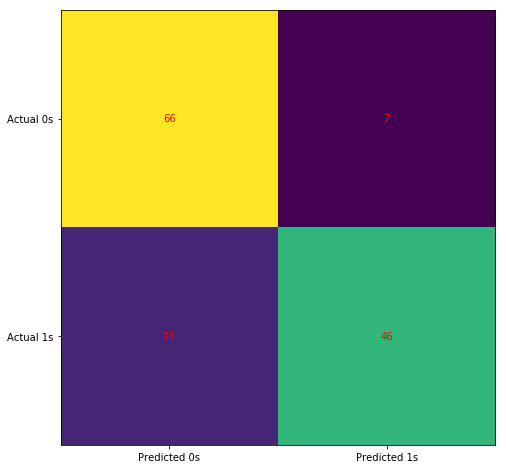

In [38]:
cm = confusion_matrix(test['purchase'],prediction)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## Model with only age predictor

In [39]:
modelage = smf.logit(formula="purchase ~ age", data=train).fit()
print(modelage.summary())

Optimization terminated successfully.
         Current function value: 0.420112
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               purchase   No. Observations:                  306
Model:                          Logit   Df Residuals:                      304
Method:                           MLE   Df Model:                            1
Date:                Mon, 19 Jul 2021   Pseudo R-squ.:                  0.3529
Time:                        19:00:03   Log-Likelihood:                -128.55
converged:                       True   LL-Null:                       -198.67
                                        LLR p-value:                 2.369e-32
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9430      0.166     -5.673      0.000      -1.269      -0.617
age            2.0781      0.

In [40]:
## Train set predictions
trainpred_prob=modelage.predict(train)
train_prediction = list(map(round, trainpred_prob))

In [41]:
print(classification_report(train['purchase'],train_prediction))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       198
           1       0.86      0.69      0.76       108

    accuracy                           0.85       306
   macro avg       0.85      0.81      0.83       306
weighted avg       0.85      0.85      0.85       306



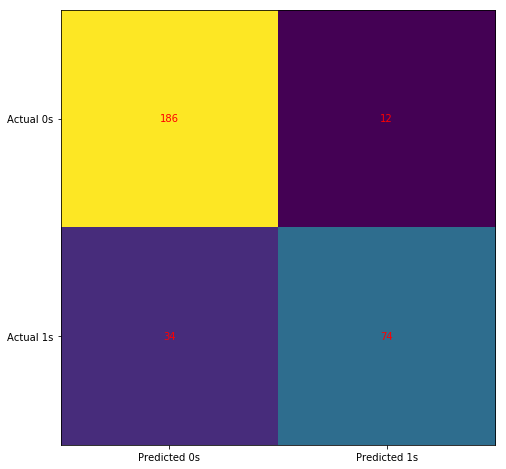

In [42]:
cm = confusion_matrix(train['purchase'],train_prediction)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [43]:
## Test set predictions
pred_prob=modelage.predict(test)
prediction = list(map(round, pred_prob))

In [44]:
print(classification_report(test['purchase'],prediction))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83        73
           1       0.86      0.64      0.74        59

    accuracy                           0.80       132
   macro avg       0.81      0.78      0.79       132
weighted avg       0.81      0.80      0.79       132



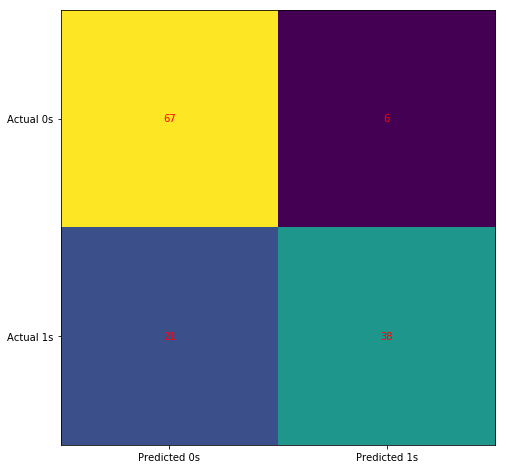

In [45]:
cm = confusion_matrix(test['purchase'],prediction)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## Model with only income predictor

In [46]:
modelinc = smf.logit(formula="purchase ~ income", data=train).fit()
print(modelinc.summary())

Optimization terminated successfully.
         Current function value: 0.595425
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               purchase   No. Observations:                  306
Model:                          Logit   Df Residuals:                      304
Method:                           MLE   Df Model:                            1
Date:                Mon, 19 Jul 2021   Pseudo R-squ.:                 0.08290
Time:                        19:00:03   Log-Likelihood:                -182.20
converged:                       True   LL-Null:                       -198.67
                                        LLR p-value:                 9.507e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6298      0.127     -4.957      0.000      -0.879      -0.381
income         0.7708      0.

In [47]:
## Train set predictions
trainpred_prob=modelinc.predict(train)
train_prediction = list(map(round, trainpred_prob))

In [48]:
print(classification_report(train['purchase'],train_prediction))

              precision    recall  f1-score   support

           0       0.74      0.97      0.84       198
           1       0.89      0.37      0.52       108

    accuracy                           0.76       306
   macro avg       0.81      0.67      0.68       306
weighted avg       0.79      0.76      0.73       306



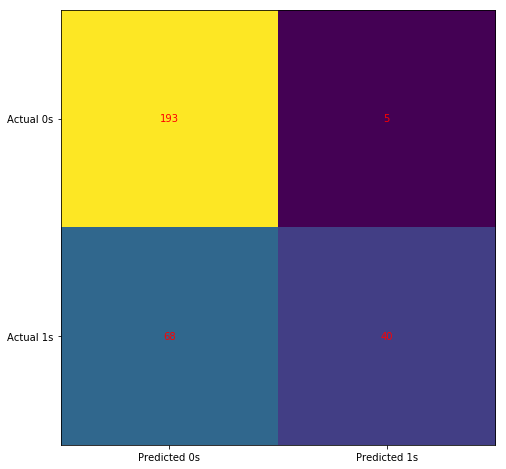

In [49]:
cm = confusion_matrix(train['purchase'],train_prediction)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [50]:
## Test set predictions
pred_prob=modelinc.predict(test)
prediction = list(map(round, pred_prob))

In [51]:
print(classification_report(test['purchase'],prediction))

              precision    recall  f1-score   support

           0       0.71      0.92      0.80        73
           1       0.84      0.53      0.65        59

    accuracy                           0.74       132
   macro avg       0.77      0.72      0.72       132
weighted avg       0.76      0.74      0.73       132



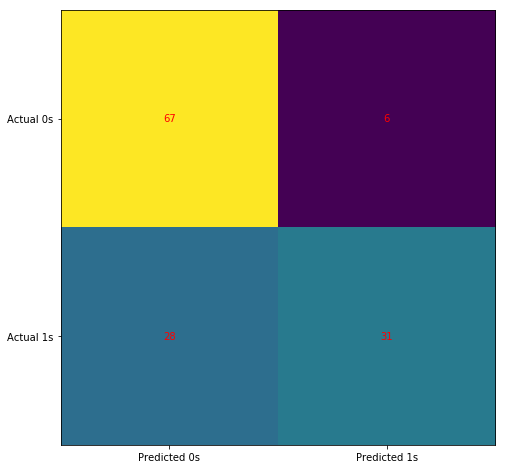

In [52]:
cm = confusion_matrix(test['purchase'],prediction)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## Model with only sex_Male predictor

In [53]:
modelgen = smf.logit(formula="purchase ~ sex_Male", data=train).fit()
print(modelgen.summary())

Optimization terminated successfully.
         Current function value: 0.649216
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               purchase   No. Observations:                  306
Model:                          Logit   Df Residuals:                      304
Method:                           MLE   Df Model:                            1
Date:                Mon, 19 Jul 2021   Pseudo R-squ.:               4.989e-05
Time:                        19:00:03   Log-Likelihood:                -198.66
converged:                       True   LL-Null:                       -198.67
                                        LLR p-value:                    0.8880
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5898      0.167     -3.540      0.000      -0.916      -0.263
sex_Male      -0.0337      0.

In [54]:
## Train set predictions
trainpred_prob=modelgen.predict(train)
train_prediction = list(map(round, trainpred_prob))

In [55]:
print(classification_report(train['purchase'],train_prediction))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       198
           1       0.00      0.00      0.00       108

    accuracy                           0.65       306
   macro avg       0.32      0.50      0.39       306
weighted avg       0.42      0.65      0.51       306



/Users/Figege/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Figege/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Figege/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


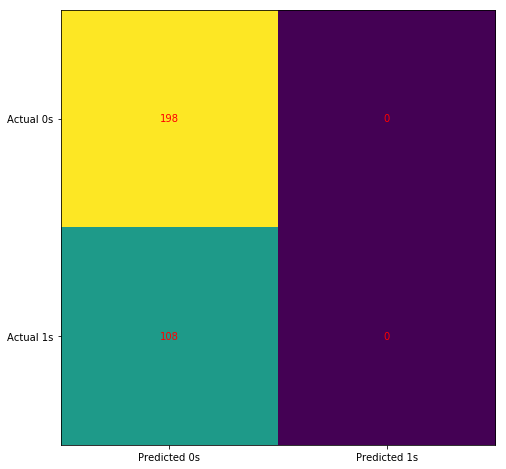

In [56]:
cm = confusion_matrix(train['purchase'],train_prediction)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [57]:
## Test set predictions
pred_prob=modelgen.predict(test)
prediction = list(map(round, pred_prob))

In [58]:
print(classification_report(test['purchase'],prediction))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        73
           1       0.00      0.00      0.00        59

    accuracy                           0.55       132
   macro avg       0.28      0.50      0.36       132
weighted avg       0.31      0.55      0.39       132



/Users/Figege/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Figege/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Figege/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


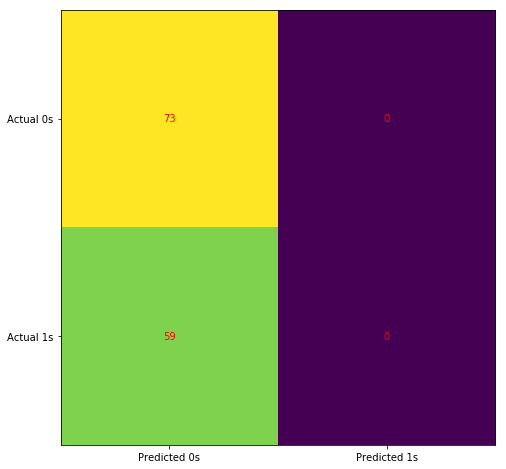

In [59]:
cm = confusion_matrix(test['purchase'],prediction)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()